<a href="https://colab.research.google.com/github/Lily925/Biziya-Bolorsaran/blob/main/%5BAI2025%5D_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [TODO]

## Mall custermer data

There is information on the customer's gender, age, and annual revenue, and spending score filled with scores from 1 to 100 on the purchase amount.

In [39]:
import pandas as pd


In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/wonseok-hong/DAP_TA/main/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


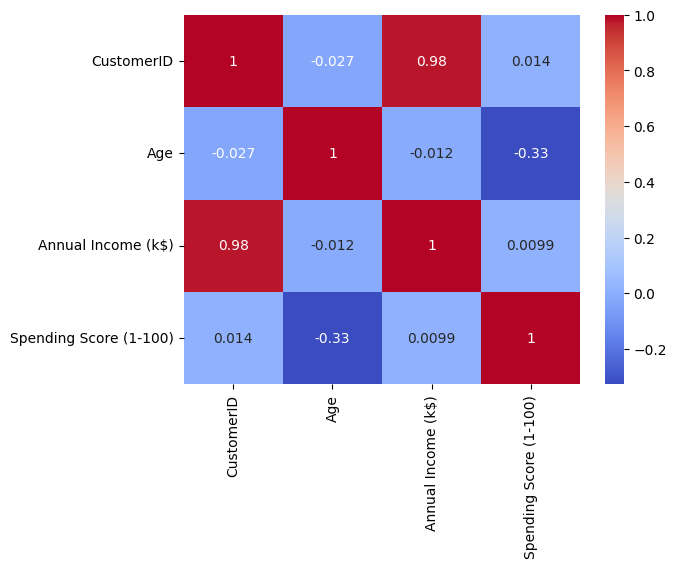

In [42]:


# Select Numeric Values
df_num = df.select_dtypes(include=['int64', 'float64'])

# Heatmap
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.show()


##Data Preprocessing

We will choose Annual Income (k$), Spending Score (1-100), and Z-score Scaling (by sklearn.preprocessing.StandardScaler)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Choosing
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

data.head()


,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


## Elbow analysis with K-MEANS

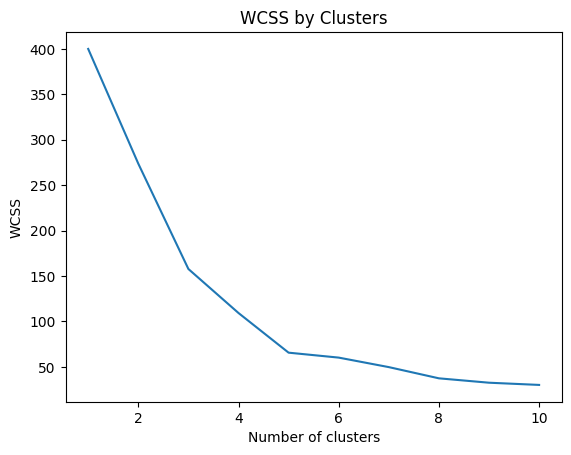

In [44]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    # Create model
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)

    # Fit the data points  (data = clustering хийх feature-үүд)
    kmeans.fit(data)

    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)

# Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



### K-means fitting
- n_clusters = k
- random_state = 0


In [45]:
from sklearn.cluster import KMeans

# 1. Select only numeric features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 2. Create model
k = 3
model = KMeans(n_clusters=k, random_state=42)

# 3. Fit model
model.fit(X)

# 4. Predict cluster labels
pred = model.predict(X)

# 5. Add cluster result to dataframe
df['cluster'] = pred



### Scatter Plot with Cluster Color

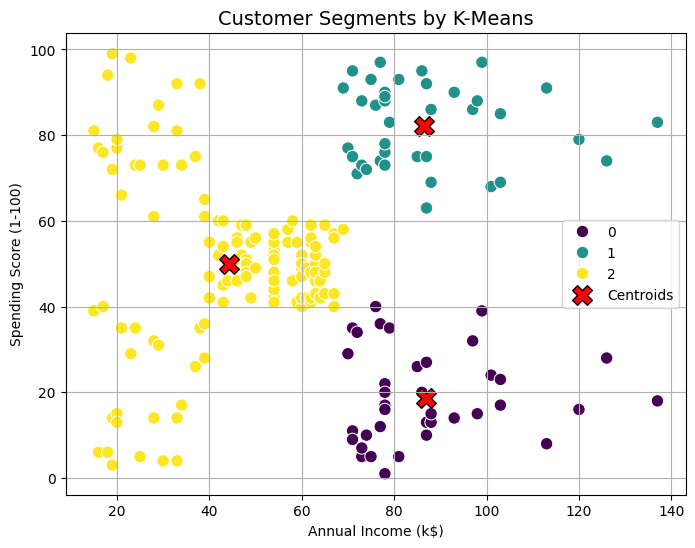

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1) Select numeric features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 2) Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) KMeans
model = KMeans(n_clusters=3, random_state=42)
model.fit(X_scaled)
df['cluster'] = model.predict(X_scaled)

# 4) Scatter plot (original scale)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='cluster',
    data=df,
    palette='viridis',
    s=80
)

# 5) Restore centroid locations
centers_original = scaler.inverse_transform(model.cluster_centers_)

plt.scatter(
    centers_original[:, 0], centers_original[:, 1],
    c='red', s=200, marker='X', edgecolor='black', label='Centroids'
)

plt.title('Customer Segments by K-Means', fontsize=14)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


### Dendrogram

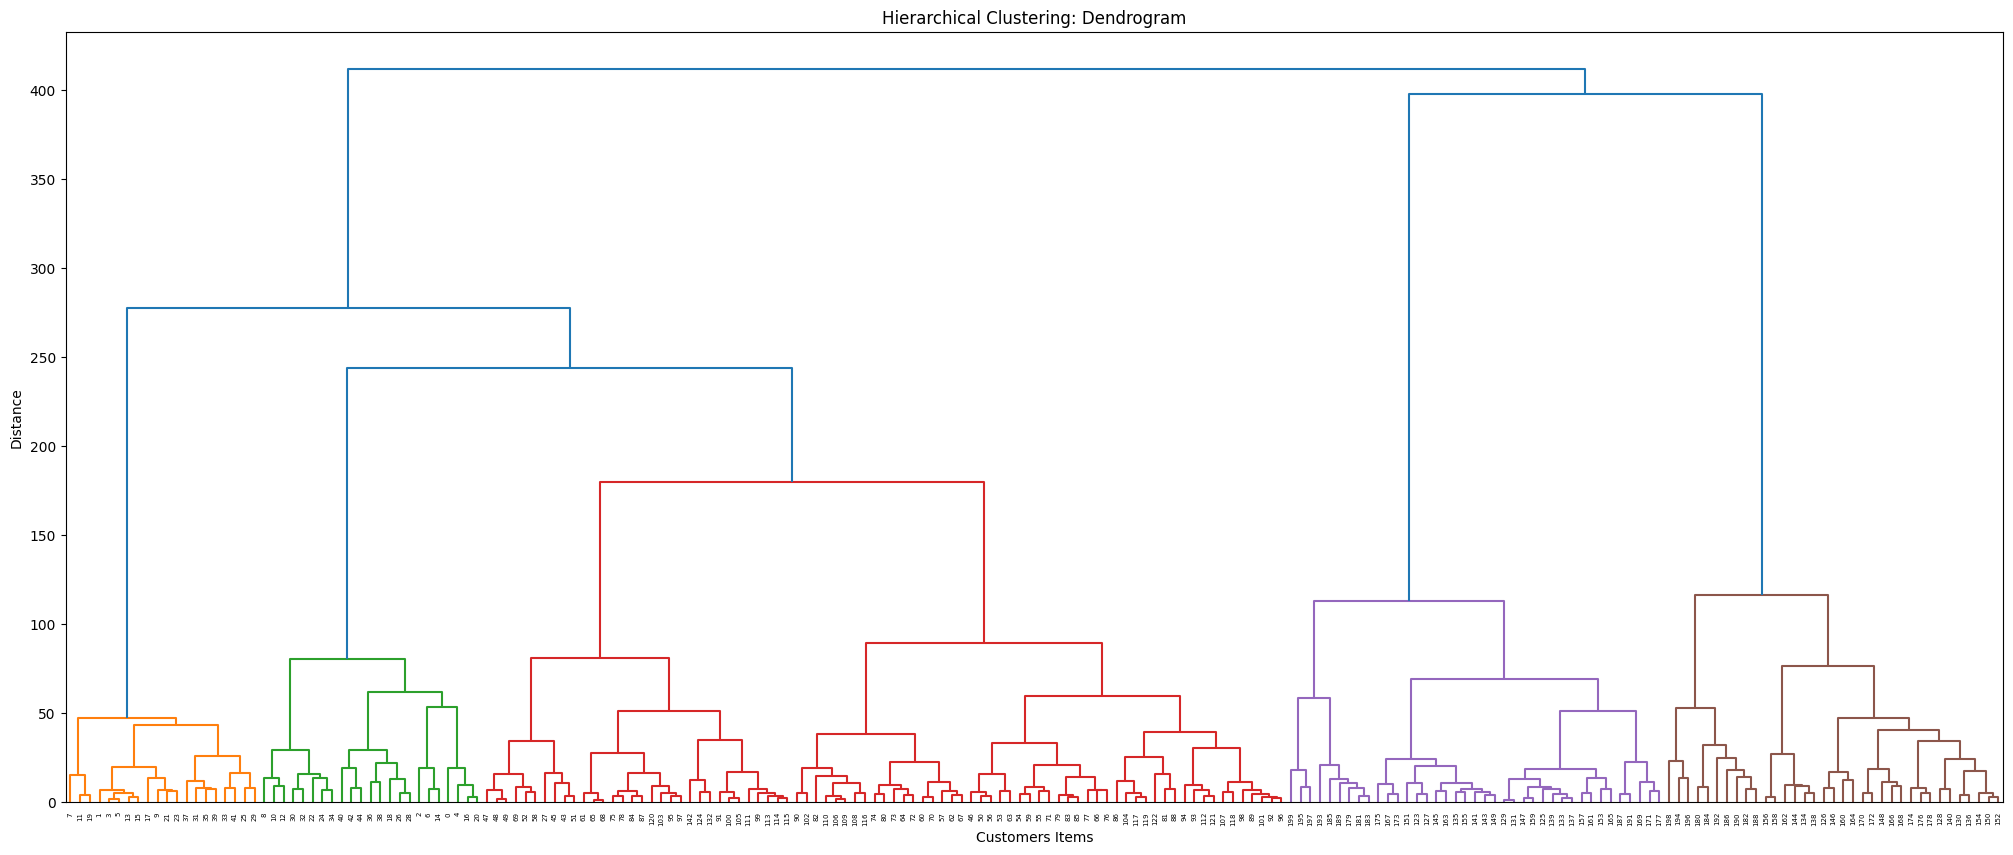

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# numeric features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
# X = df_num  # хэрвээ дээр нь df_num гэж авсан бол

# create dendrogram using ward linkage
Z = linkage(X, method='ward')

fig = plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    color_threshold=Z[:, 2].max() / 2   # threshold is set by half of max value
)

# Set title of the plot
plt.title('Hierarchical Clustering: Dendrogram')
plt.xlabel('Customers Items')
plt.ylabel('Distance')
plt.show()



### Silhouette Score

In [48]:
from sklearn.metrics import silhouette_score

print("Silhouette Coefficient:", silhouette_score(data, pred))

Silhouette Coefficient: 0.3482246505823564
